In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import zipfile
import kaggle

In [270]:
!kaggle datasets download -d selfvivek/environment-impact-of-food-production

environment-impact-of-food-production.zip: Skipping, found more recently modified local copy (use --force to force download)


In [271]:
zipfile_name = 'environment-impact-of-food-production.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [272]:
df = pd.read_csv("Food_Production.csv")

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [274]:
df.shape

(43, 23)

In [275]:
df

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,...,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,...,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,...,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,5.008798,...,203.503036,435.7,0.524927,0.836058,4.565982,15.57,7.272303,22477.4,10498.552080,NaN


In [276]:
# check for missing
missing_values = df.isnull().sum()
print(missing_values)

Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

In [277]:
# drop all missing values to focus on main objective of seaborn visualizations
df = df.dropna(axis=1)

In [278]:
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0


In [279]:
# functions for style standardising for less repeating code
def set_plot_style():
    sns.set(style='darkgrid')



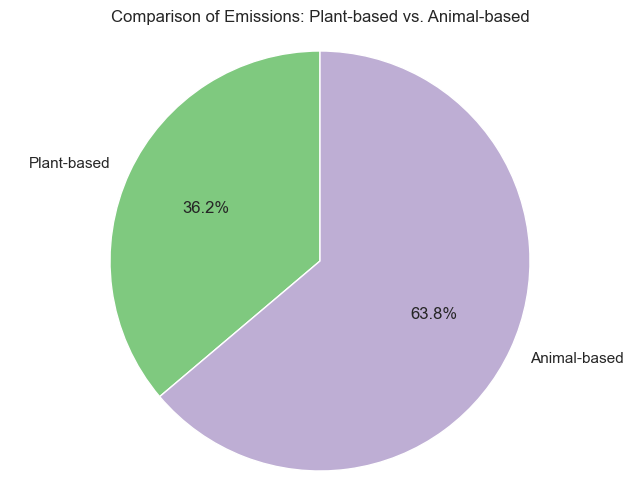

In [280]:
# defind plant based and animal based foods from food product column
plant_based = [
    "Wheat & Rye (Bread)", "Maize (Meal)", "Barley (Beer)", "Oatmeal", "Rice", "Potatoes", "Cassava", "Cane Sugar", "Beet Sugar", "Other Pulses", "Peas", "Nuts", "Groundnuts", "Soymilk", "Tofu", "Soybean Oil", "Palm Oil", "Sunflower Oil", "Rapeseed Oil", "Olive Oil", "Tomatoes", "Onions & Leeks", "Root Vegetables", "Brassicas", "Other Vegetables", "Citrus Fruit", "Bananas", "Apples", "Berries & Grapes", "Wine", "Other Fruit", "Coffee", "Dark Chocolate"
]

animal_based = [
    "Beef (beef herd)", "Beef (dairy herd)", "Lamb & Mutton", "Pig Meat", "Poultry Meat", "Milk", "Cheese", "Eggs", "Fish (farmed)", "Shrimps (farmed)"
]

plant_based_emissions = df.loc[df['Food product'].isin(plant_based), 'Total_emissions'].sum()
animal_based_emissions = df.loc[df['Food product'].isin(animal_based), 'Total_emissions'].sum()

data = pd.DataFrame({'Food Category': ['Plant-based', 'Animal-based'],
                     'Total Emissions': [plant_based_emissions, animal_based_emissions]})

plt.figure(figsize=(8, 6))
ax = plt.subplot()
ax.pie(data['Total Emissions'], labels=data['Food Category'], autopct='%1.1f%%', startangle=90,
       colors=['#7fc97f', '#beaed4'], wedgeprops={'edgecolor': 'white'})
plt.title('Comparison of Emissions: Plant-based vs. Animal-based')
ax.axis('equal')
plt.show()

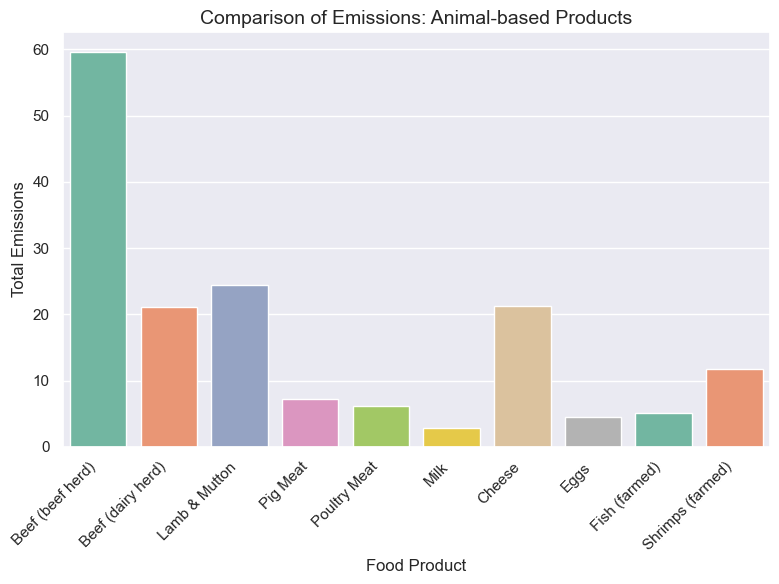

In [288]:
animal_data = df[df['Food product'].isin(animal_based)]

plt.figure(figsize=(8, 6))

ax = sns.barplot(data=animal_data, x='Food product', y='Total_emissions', palette='Set2')

plt.xlabel('Food Product', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.title('Comparison of Emissions: Animal-based Products', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

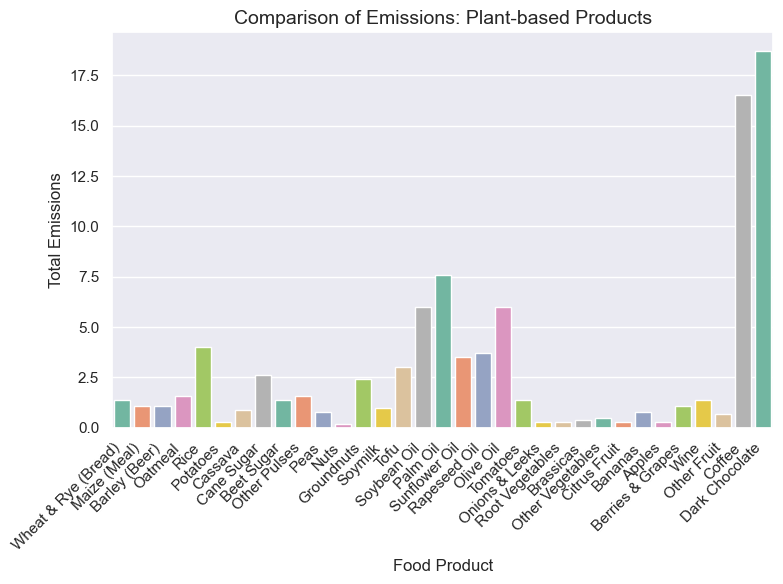

In [287]:
plant_data = df[df['Food product'].isin(plant_based)]

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=plant_data, x='Food product', y='Total_emissions', palette='Set2')

plt.xlabel('Food Product', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)
plt.title('Comparison of Emissions: Plant-based Products', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

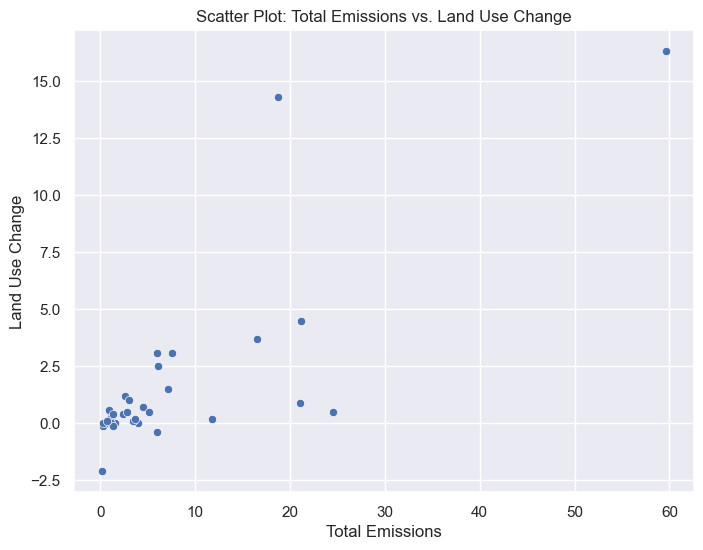

In [283]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total_emissions', y='Land use change')
plt.xlabel('Total Emissions')
plt.ylabel('Land Use Change')
plt.title('Scatter Plot: Total Emissions vs. Land Use Change')
plt.show()

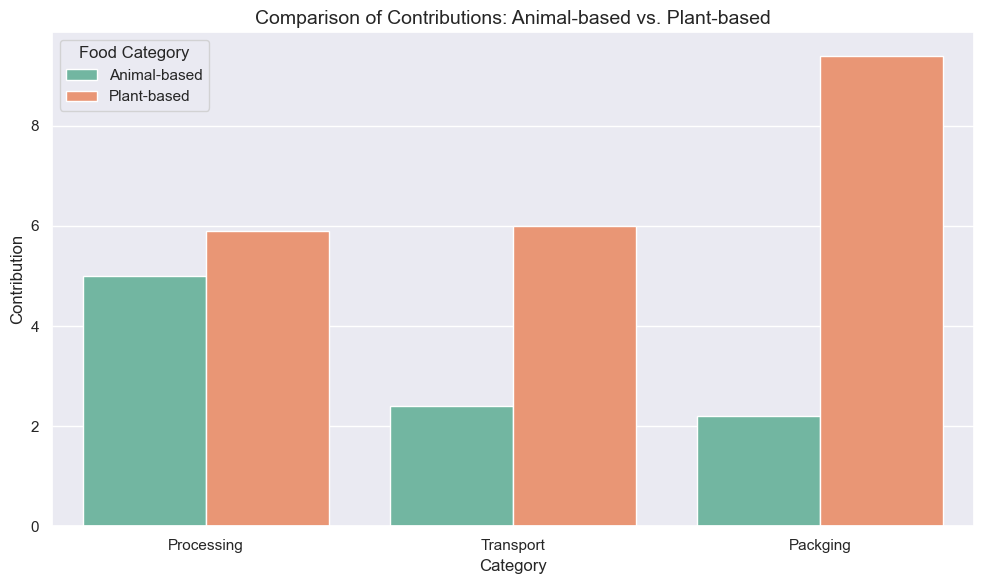

In [284]:
categories = ['Processing', 'Transport', 'Packging']
data = pd.DataFrame({
    'Category': categories,
    'Animal-based': animal_based_df[categories].sum(),
    'Plant-based': plant_based_df[categories].sum()
})
data_melted = data.melt(id_vars='Category', var_name='Food Category', value_name='Contribution')

set_plot_style()
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data_melted, x='Category', y='Contribution', hue='Food Category', palette='Set2')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Contribution', fontsize=12)
plt.title('Comparison of Contributions: Animal-based vs. Plant-based', fontsize=14)
plt.legend(title='Food Category')
plt.tight_layout()
plt.show()